<a href="https://colab.research.google.com/github/mehrnazeraeisi/Boston_Housing/blob/main/BostonHousing_knnregression_modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#[1]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split

In [7]:
# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        y_pred = knn_reg.predict(X_feature)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        features_scores.append((feature, r2, mse))  # اضافه شد

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score', 'MSE']).sort_values(by='R2_Score', ascending=False)
    return df_scores


In [8]:
# بارگذاری فایل
data = pd.read_csv('BostonHousing.csv')

print(data.columns)

# جدا کردن ویژگی‌ها و برچسب‌ها
X_data = data.drop('medv', axis=1)  # همه ستون‌ها به جز 'target'
y_data = data['medv']              # فقط ستون 'target'
data_features = X_data.columns       # نام ویژگی‌ها

# نمایش اطلاعات
print(data.head())
print("ویژگی‌ها:", list(data_features))

data.shape


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
ویژگی‌ها: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


(506, 14)

In [23]:
# Run feature prioritization for the iris dataset
data_scores = features_prioritization(X_data, y_data, data_features)
print("🔎 Feature Group Performance Summary (Boston Housing dataset):")
print(data_scores)  # Categorize features by R² score

🔎 Feature Group Performance Summary (Boston Housing dataset):
    Feature  R2_Score         MSE
12    lstat  0.734911   22.378655
5        rm  0.686989   26.424267
4       nox  0.633597   30.931555
0      crim  0.437419   47.492813
7       dis  0.346941   55.130964
6       age  0.287784   60.124950
11        b  0.261850   62.314263
2     indus  0.226640   65.286726
10  ptratio  0.219854   65.859572
9       tax  0.193131   68.115501
8       rad -0.022404   86.310926
3      chas -0.282470  108.265584
1        zn -0.333761  112.595474


In [10]:
# Categorizing features by R² score into multiple levels
strong_features = data_scores[data_scores['R2_Score'] > 0.7]['Feature'].tolist()
medium_features_1 = data_scores[(data_scores['R2_Score'] > 0.6)]['Feature'].tolist()
medium_features_2 = data_scores[(data_scores['R2_Score'] > 0.4)]['Feature'].tolist()
medium_features_3 = data_scores[(data_scores['R2_Score'] > 0.3)]['Feature'].tolist()
medium_features_4 = data_scores[(data_scores['R2_Score'] > 0.26)]['Feature'].tolist()
medium_features_5 = data_scores[(data_scores['R2_Score'] > 0.2)]['Feature'].tolist()
medium_features_6 = data_scores[(data_scores['R2_Score'] > 0.1)]['Feature'].tolist()
medium_features_7 = data_scores[(data_scores['R2_Score'] > -0.1)]['Feature'].tolist()
medium_features_8 = data_scores[(data_scores['R2_Score'] > -0.2)]['Feature'].tolist()




In [11]:
# Function to safely compute KNN R² score for feature group

def knn_score(X_data, y_data, selected_features):
    if len(selected_features) == 0:  # اصلاح این خط
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    return model.score(X_subset, y_data)

In [12]:


# Function to prioritize features based on KNN MSE

def knn_mse(X_data, y_data, selected_features):
    if len(selected_features) == 0:
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    y_pred = model.predict(X_subset)
    return mean_squared_error(y_data, y_pred)



In [13]:

# Compute R² and accuracy scores for each group
groups = [data_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6,medium_features_7, medium_features_8 ]

r2_scores = [knn_score(X_data, y_data, group) for group in groups]
mse_scores = [knn_mse(X_data, y_data, group) for group in groups]


In [22]:
# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features_1 (0.7-0.8)', 'Medium Features_2 (0.6-0.7)',
                      'Medium Features_3 (0.5-0.6)', 'Medium Features_4 (0.4-0.5)', 'Medium Features_5 (0.3-0.4)',
                      'Medium Features_6 (0.2-0.3)', 'medium_features_7', 'medium_features_8'],
    'R2_Score': r2_scores,
    'MSE':mse_scores

})

print("\n📊 Grouped Feature Performance Summary (R² and MSE):")
print(summary_df)


📊 Grouped Feature Performance Summary (R² and MSE):
                 Feature_Group  R2_Score        MSE
0                 All Features  0.716098  23.966862
1              Strong Features  0.734911  22.378655
2  Medium Features_1 (0.7-0.8)  0.836700  13.785737
3  Medium Features_2 (0.6-0.7)  0.873333  10.693145
4  Medium Features_3 (0.5-0.6)  0.861451  11.696277
5  Medium Features_4 (0.4-0.5)  0.767491  19.628338
6  Medium Features_5 (0.3-0.4)  0.787247  17.960493
7  Medium Features_6 (0.2-0.3)  0.722553  23.421938
8            medium_features_7  0.723343  23.355291
9            medium_features_8  0.723343  23.355291


In [15]:

def knn_evaluation(X_data, y_data,medium_features_2, data_features, test_size, n_repeats):
    # Initialize lists to store the results


    mse_scores = {
        "all_features": [],
        "medium_features_2": []
    }

    r2_scores = {
        "all_features": [],
        "medium_features_2": []
    }


    # List of feature groups to evaluate
    feature_groups = {
        "all_features": data_features,
        "medium_features_2": medium_features_2
    }

    # Repeat the process n_repeats times with different train-test splits
    for _ in range(n_repeats):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            # KNN Regressor
            knn_reg = KNeighborsRegressor(n_neighbors=5)
            knn_reg.fit(X_train[group_features], y_train)
            y_pred_reg = knn_reg.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred_reg))
            mse_scores[group_name].append(mean_squared_error(y_test, y_pred_reg))

    # Plot results for R² and Accuracy
    x = np.arange(1, n_repeats + 1)


    # R² plot
    plt.figure( figsize=(8, 4))
    for group_name, r2_list in r2_scores.items():
        plt.plot(x, r2_list, label=f"{group_name.replace('_', ' ').title()} R²", marker='x')
    plt.xlabel('Repeat')
    plt.ylabel('R² Score')
    plt.title('KNN Regressor Performance')
    plt.legend()
    plt.show()


    # MSE plot
    plt.figure(figsize=(8, 4))
    for group_name, mse_list in mse_scores.items():
        plt.plot(x, mse_list, label=f"{group_name.replace('_', ' ').title()} MSE", marker='s')
    plt.xlabel('Repeat')
    plt.ylabel('Mean Squared Error')
    plt.title('KNN Regressor MSE Performance')
    plt.legend()
    plt.show()



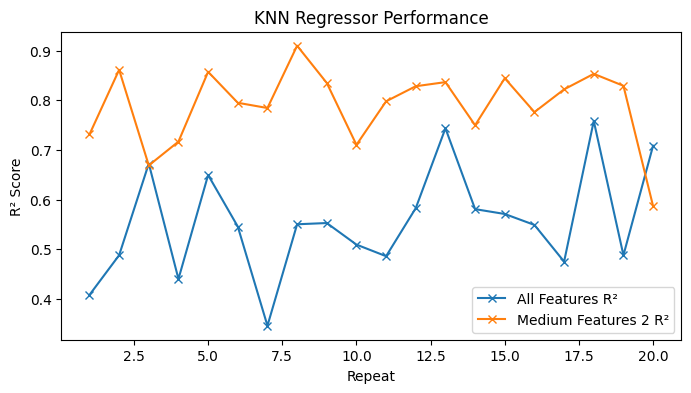

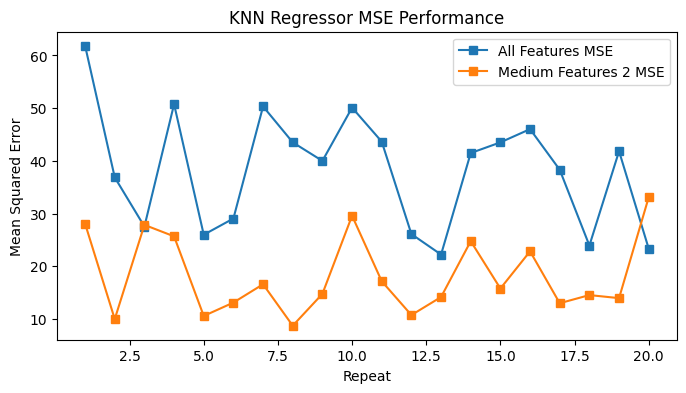

In [16]:

# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_2, data_features, test_size=0.1, n_repeats=20)


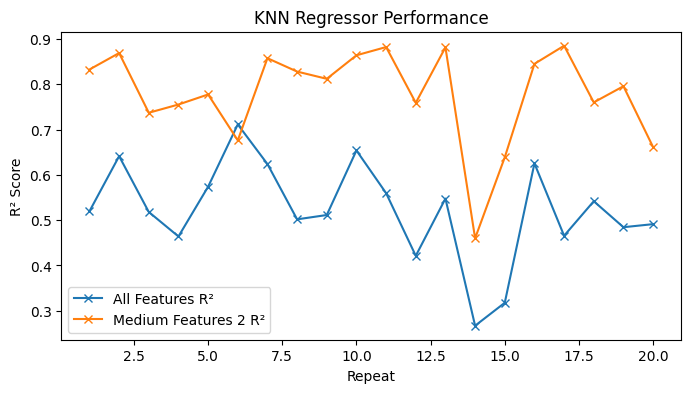

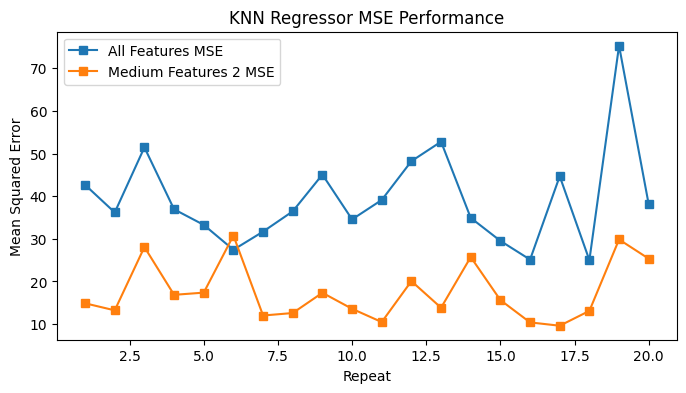

In [17]:
# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_2,  data_features, test_size=0.13, n_repeats=20)


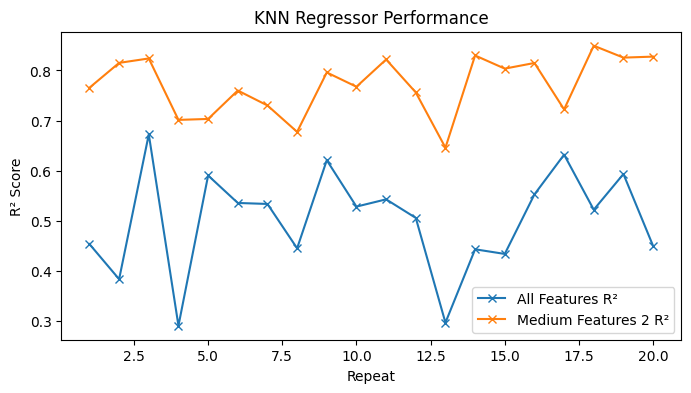

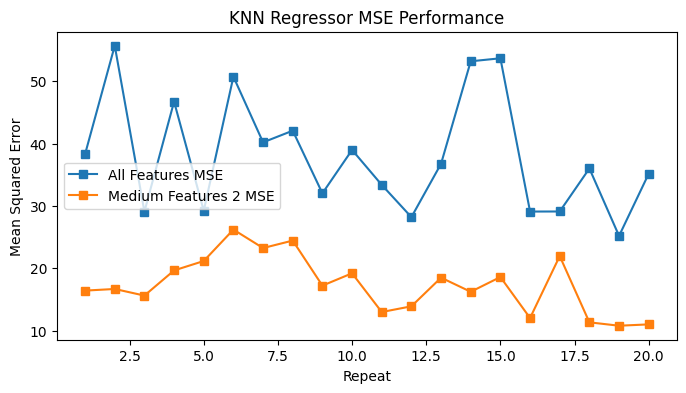

In [18]:
# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_2,  data_features, test_size=0.16, n_repeats=20)


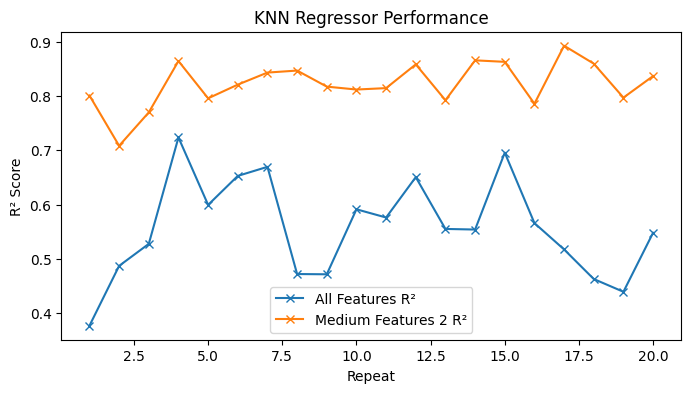

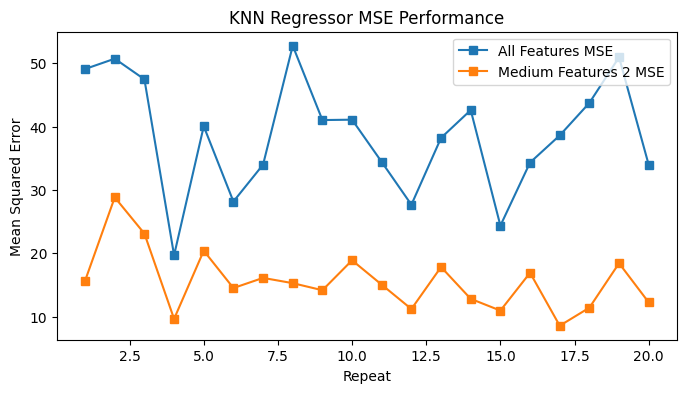

In [19]:
# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_2, data_features, test_size=0.19, n_repeats=20)


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
ویژگی‌ها: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
🔎 Feature Group Performance Summary (Boston Housing dataset):
    Feature  R2_Score         MSE
12    lstat  0.734911  

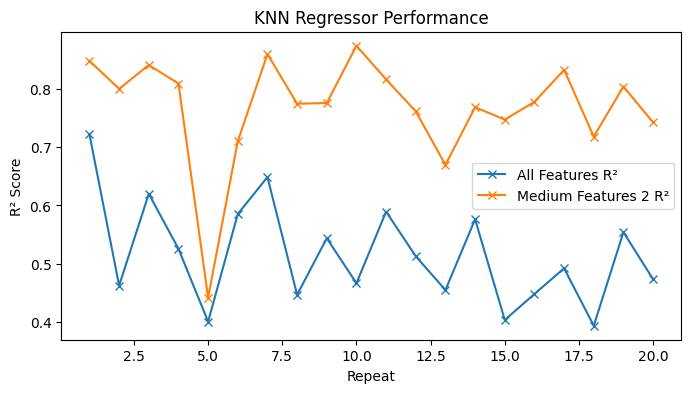

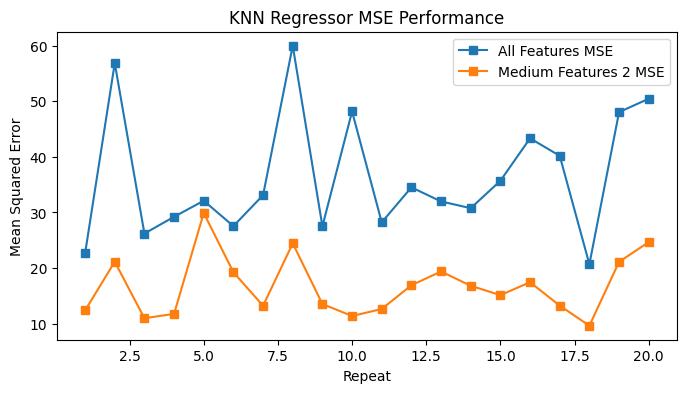

   Percentage Repetition    MSE_All    R2_All  MSE_Modified  R2_Modified
0         10%        n=1  33.565694  0.555745     21.337059     0.717596
1         10%        n=2  32.579671  0.609751     17.287325     0.792927
2         10%        n=3  35.702322  0.567276      8.897490     0.892160
3         10%        n=4  30.394957  0.429516      7.391412     0.861270
4         10%        n=5  33.182776  0.547614     12.038188     0.835881
..        ...        ...        ...       ...           ...          ...
95        25%       n=16  34.971710  0.661547     12.904416     0.875112
96        25%       n=17  33.541783  0.581763     16.678091     0.792039
97        25%       n=18  32.776835  0.564932     18.553061     0.753733
98        25%       n=19  30.902454  0.622110     17.920580     0.780859
99        25%       n=20  50.103285  0.427948     20.069792     0.770854

[100 rows x 6 columns]


In [21]:
#[1]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split


# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        y_pred = knn_reg.predict(X_feature)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        features_scores.append((feature, r2, mse))  # اضافه شد

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score', 'MSE']).sort_values(by='R2_Score', ascending=False)
    return df_scores

# بارگذاری فایل
data = pd.read_csv('BostonHousing.csv')

print(data.columns)

# جدا کردن ویژگی‌ها و برچسب‌ها
X_data = data.drop('medv', axis=1)  # همه ستون‌ها به جز 'target'
y_data = data['medv']              # فقط ستون 'target'
data_features = X_data.columns       # نام ویژگی‌ها

# نمایش اطلاعات
print(data.head())
print("ویژگی‌ها:", list(data_features))

data.shape

#[5]
# Run feature prioritization for the iris dataset
data_scores = features_prioritization(X_data, y_data, data_features)
print("🔎 Feature Group Performance Summary (Boston Housing dataset):")
print(data_scores)  # Categorize features by R² score

# Categorizing features by R² score into multiple levels
strong_features = data_scores[data_scores['R2_Score'] > 0.7]['Feature'].tolist()
medium_features_1 = data_scores[(data_scores['R2_Score'] > 0.6)]['Feature'].tolist()
medium_features_2 = data_scores[(data_scores['R2_Score'] > 0.4)]['Feature'].tolist()
medium_features_3 = data_scores[(data_scores['R2_Score'] > 0.3)]['Feature'].tolist()
medium_features_4 = data_scores[(data_scores['R2_Score'] > 0.26)]['Feature'].tolist()
medium_features_5 = data_scores[(data_scores['R2_Score'] > 0.2)]['Feature'].tolist()
medium_features_6 = data_scores[(data_scores['R2_Score'] > 0.1)]['Feature'].tolist()
medium_features_7 = data_scores[(data_scores['R2_Score'] > -0.1)]['Feature'].tolist()
medium_features_8 = data_scores[(data_scores['R2_Score'] > -0.2)]['Feature'].tolist()




#[7]
# Function to safely compute KNN R² score for feature group

def knn_score(X_data, y_data, selected_features):
    if len(selected_features) == 0:  # اصلاح این خط
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    return model.score(X_subset, y_data)


# Function to prioritize features based on KNN MSE

def knn_mse(X_data, y_data, selected_features):
    if len(selected_features) == 0:
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    y_pred = model.predict(X_subset)
    return mean_squared_error(y_data, y_pred)





# Compute R² and accuracy scores for each group
groups = [data_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6,medium_features_7, medium_features_8 ]

r2_scores = [knn_score(X_data, y_data, group) for group in groups]
mse_scores = [knn_mse(X_data, y_data, group) for group in groups]

# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features_1 (0.7-0.8)', 'Medium Features_2 (0.6-0.7)',
                      'Medium Features_3 (0.5-0.6)', 'Medium Features_4 (0.4-0.5)', 'Medium Features_5 (0.3-0.4)',
                      'Medium Features_6 (0.2-0.3)', 'medium_features_7', 'medium_features_8'],
    'R2_Score': r2_scores,
    'MSE':mse_scores

})

print("\n📊 Grouped Feature Performance Summary (R² and Accuracy):")
print(summary_df)



def knn_evaluation(X_data, y_data, medium_features_2, data_features, test_size, n_repeats):
    # Initialize lists to store the results

    mse_scores = {
        "all_features": [],
        "medium_features_2": []
    }


    r2_scores = {
        "all_features": [],
        "medium_features_2": [],
    }

    # List of feature groups to evaluate
    feature_groups = {
        "all_features": data_features,
        "medium_features_2": medium_features_2,
    }

    # Repeat the process n_repeats times with different train-test splits
    for _ in range(n_repeats):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            # KNN Regressor
            knn_reg = KNeighborsRegressor(n_neighbors=5)
            knn_reg.fit(X_train[group_features], y_train)
            y_pred_reg = knn_reg.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred_reg))
            mse_scores[group_name].append(mean_squared_error(y_test, y_pred_reg))

    # Plot results for R² and Accuracy
    x = np.arange(1, n_repeats + 1)


    # R² plot
    plt.figure( figsize=(8, 4))
    for group_name, r2_list in r2_scores.items():
        plt.plot(x, r2_list, label=f"{group_name.replace('_', ' ').title()} R²", marker='x')
    plt.xlabel('Repeat')
    plt.ylabel('R² Score')
    plt.title('KNN Regressor Performance')
    plt.legend()
    plt.show()

    # MSE plot
    plt.figure(figsize=(8, 4))
    for group_name, mse_list in mse_scores.items():
        plt.plot(x, mse_list, label=f"{group_name.replace('_', ' ').title()} MSE", marker='s')
    plt.xlabel('Repeat')
    plt.ylabel('Mean Squared Error')
    plt.title('KNN Regressor MSE Performance')
    plt.legend()
    plt.show()


# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data,  medium_features_2, data_features, test_size=0.10, n_repeats=20)



def knn_evaluation_table(X_data, y_data,  medium_features_2, data_features, test_sizes, n_repeats):
    results = []

    feature_groups = {
        "All": data_features,
        "medium_features_2": medium_features_2
    }

    for test_size in test_sizes:
        for i in range(1, n_repeats + 1):
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

            # محاسبه برای همه ویژگی‌ها
            knn_reg_all = KNeighborsRegressor(n_neighbors=5)
            knn_reg_all.fit(X_train[feature_groups["All"]], y_train)
            y_pred_all = knn_reg_all.predict(X_test[feature_groups["All"]])
            mse_all = mean_squared_error(y_test, y_pred_all)
            r2_all = r2_score(y_test, y_pred_all)

            # محاسبه برای ویژگی‌های متوسط
            knn_reg_modified = KNeighborsRegressor(n_neighbors=5)
            knn_reg_modified.fit(X_train[feature_groups["medium_features_2"]], y_train)
            y_pred_modified = knn_reg_modified.predict(X_test[feature_groups["medium_features_2"]])
            mse_modified = mean_squared_error(y_test, y_pred_modified)
            r2_modified = r2_score(y_test, y_pred_modified)

            # ذخیره در لیست
            results.append({
                "Percentage": f"{int(test_size * 100)}%",
                "Repetition": f"n={i}",
                "MSE_All": mse_all,
                "R2_All": r2_all,
                "MSE_Modified": mse_modified,
                "R2_Modified": r2_modified
            })

    # ساخت دیتافریم خروجی
    df_result = pd.DataFrame(results)
    return df_result


# درصدهای تست مختلف
test_sizes = [0.10, 0.13, 0.16, 0.19, 0.25]
n_repeats = 20

# اجرای ارزیابی و دریافت جدول
final_df = knn_evaluation_table(X_data, y_data,  medium_features_2, data_features, test_sizes, n_repeats)

# نمایش جدول
print(final_df)

# (اختیاری) ذخیره جدول در فایل اکسل یا CSV
# final_df.to_csv("knn_results_table.csv", index=False)
